## Transmission Competition

### Imports

In [61]:
from typing import Optional
import numpy as np
import os
import matplotlib.pyplot as plt
from transmission_competition.HuffmanCoder import HuffmanCoder
from transmission_competition.LempelZivCoder import LempelZivCoder
from transmission_competition.HammingCoder74 import HammingCoder74
from transmission_competition.EntropyCalculator import EntropyCalculator
from transmission_competition.PSKModulator import PSKModulator
from transmission_competition.CSSModulator import CSSModulator 
from transmission_competition.Synchroniser import Synchroniser


### Input Definition
Here we can change our input string.


In [62]:
file_path = "input_text_short.txt"
file_handle = open(file_path, "r")
input_text = file_handle.read()
file_handle.close()

print(f"Input text: {input_text}")

Input text: Hello, world!


### Entropy Calculations
Here we can calculate a couple of interesting values.

In [63]:
entropy_calculator = EntropyCalculator(input_text)
print(f"Value entropy H: {entropy_calculator.H}")
print(f"Value max entropy H0: {entropy_calculator.H0}")
print(f"Value absolute redundancy R: {entropy_calculator.R}")
print(f"Value relative redundancy r: {entropy_calculator.r}")

Value entropy H: 3.1808329872054406
Value max entropy H0: 3.321928094887362
Value absolute redundancy R: 0.14109510768192157
Value relative redundancy r: 0.042473859653697814


### Soruce Coding
We implemented Huffman and Lempel Ziv source coding.
Both of them have a encode and a decode method. We convert from a string to an np.ndarray and vice versa.

In [64]:
huffman_coder = HuffmanCoder()
lempel_ziv_coder = LempelZivCoder()

# Huffman Coding
huffman_encoded = huffman_coder.encode(input_text)
huffman_decoded = huffman_coder.decode(huffman_encoded)

print("***** HUFFMAN CODING **********************************************")
print(f"Original Text: {input_text!r}")
print(f"Original Text Length: {len(input_text)} characters")
print(f"Encoded (Huffman): {huffman_encoded}")
print(f"Encoded Length: {len(huffman_encoded)} bits")
print(f"Decoded (Huffman): {huffman_decoded!r}")
print("Is Decoded Equal to Original?:", huffman_decoded == input_text)
print("*******************************************************************\n")

# Lempel-Ziv Coding
lempelziv_encoded = lempel_ziv_coder.encode(input_text)
lempelziv_decoded = lempel_ziv_coder.decode(lempelziv_encoded)

print("***** LEMPEL-ZIV CODING *******************************************")
print(f"Original Text: {input_text!r}")
print(f"Original Text Length: {len(input_text)} characters")
print(f"Encoded (Lempel-Ziv): {lempelziv_encoded}")
print(f"Encoded Length: {len(lempelziv_encoded)} bits")
print(f"Decoded (Lempel-Ziv): {lempelziv_decoded!r}")
print("Is Decoded Equal to Original?:", lempelziv_decoded == input_text)
print("*******************************************************************")

***** HUFFMAN CODING **********************************************
Original Text: 'Hello, world!'
Original Text Length: 13 characters
Encoded (Huffman): [0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0]
Encoded Length: 277 bits
Decoded (Huffman): 'Hello, world!'
Is Decoded Equal to Original?: True
*******************************************************************

***** LEMPEL-ZIV CODING *******************************************
Original Text: 'Hello, world!'
Original Text Lengt

### Channel Coding
We implemented (7,4) Hamming channel coding.
The input as well as the output is obviously a np.ndarray. The channel coded message is expected to be 7/4 times larger than the source coded version.

In [65]:
hamming_coder_74 = HammingCoder74()

test_sequence = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Hamming Coding
hamming_encoded = hamming_coder_74.encode(test_sequence)

# Simulate channel errors
per_bit_error_rate = 0.05  # Example error rate; adjust as needed
transmitted, error_desc = hamming_coder_74.channel_simulator(hamming_encoded, per_bit_error_rate)

# Decode the transmitted (possibly erroneous) code
hamming_decoded = hamming_coder_74.decode(transmitted)

print("***** HAMMING CODING **********************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Encoded (Hamming): {hamming_encoded}")
print(f"Transmitted (after channel simulation): {transmitted}")
print(f"Error Description: {error_desc}")
print(f"Decoded (Hamming): {hamming_decoded}")
print("Is Decoded Equal to Original?:", np.array_equal(hamming_decoded, test_sequence))
print("*******************************************************************\n")


***** HAMMING CODING **********************************************
Original Sequence: [0 1 0 0 1 0 1 1]
Encoded (Hamming): [1 0 0 1 1 0 0 0 1 1 0 0 1 1]
Transmitted (after channel simulation): [1 0 0 1 1 1 0 0 1 1 0 0 1 1]
Error Description: Single bit error at position 5
Decoded (Hamming): [0 1 0 0 1 0 1 1]
Is Decoded Equal to Original?: True
*******************************************************************



### Modulation

We have implemented two types of modulation:

- PSK
- Chirp Modulation

All of them take a numpy array (`np.ndarray`) as input and output a numpy array with float values representing the signal.

In [66]:
psk_modulator = PSKModulator()
css_modulator = CSSModulator()

# PSK (QPSK) requires EVEN number of bits (2 bits per symbol)
# CSS can handle any number of bits (1 bit per symbol)
test_sequence = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

# Noise parameters
SNR_DB = 10.0  # Signal-to-Noise Ratio in dB

# PSK Modulation
psk_modulated = psk_modulator.PSK_modulate(test_sequence)
psk_noisy = psk_modulator.add_awgn_noise(psk_modulated, SNR_DB)
psk_demodulated = psk_modulator.PSK_demodulate(psk_noisy)

print("***** PSK MODULATION **********************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Modulated Signal Shape: {psk_modulated.shape}")
print(f"SNR: {SNR_DB} dB")
print(f"Modulated Signal (first 20 samples): {psk_modulated[:20]}")
print(f"Noisy Signal (first 20 samples): {psk_noisy[:20]}")
print(f"Demodulated Sequence: {psk_demodulated}")
print("Is Demodulated Equal to Original?:", np.array_equal(psk_demodulated, test_sequence))
print("*******************************************************************\n")

# CSS (Chirp Spread Spectrum) Modulation
css_modulated = css_modulator.CSS_modulate(test_sequence)
css_noisy = css_modulator.add_awgn_noise(css_modulated, SNR_DB)
css_demodulated = css_modulator.CSS_demodulate(css_noisy)

print("***** CSS (CHIRP) MODULATION **************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Modulated Signal Shape: {css_modulated.shape}")
print(f"SNR: {SNR_DB} dB")
print(f"Modulated Signal (first 20 samples): {css_modulated[:20]}")
print(f"Noisy Signal (first 20 samples): {css_noisy[:20]}")
print(f"Demodulated Sequence: {css_demodulated}")
print("Is Demodulated Equal to Original?:", np.array_equal(css_demodulated, test_sequence))
print("*******************************************************************\n")


***** PSK MODULATION **********************************************
Original Sequence: [0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 1]
Modulated Signal Shape: (2100,)
SNR: 10.0 dB
Modulated Signal (first 20 samples): [ 0.70710678  0.98768834  0.89100652  0.4539905  -0.15643447 -0.70710678
 -0.98768834 -0.89100652 -0.4539905   0.15643447  0.70710678  0.98768834
  0.89100652  0.4539905  -0.15643447 -0.70710678 -0.98768834 -0.89100652
 -0.4539905   0.15643447]
Noisy Signal (first 20 samples): [ 0.67268931  0.93486155  0.60346525  0.71106938 -0.15649016 -0.82585347
 -1.32751431 -0.91938588 -0.28971923  0.15835106  0.56358663  1.53573644
  0.91895956  0.12278446  0.21974906 -0.34387    -1.21436189 -0.51174826
 -0.66007073  0.22446721]
Demodulated Sequence: [0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 1]
Is Demodulated Equal to Original?: True
*******************************************************************

***

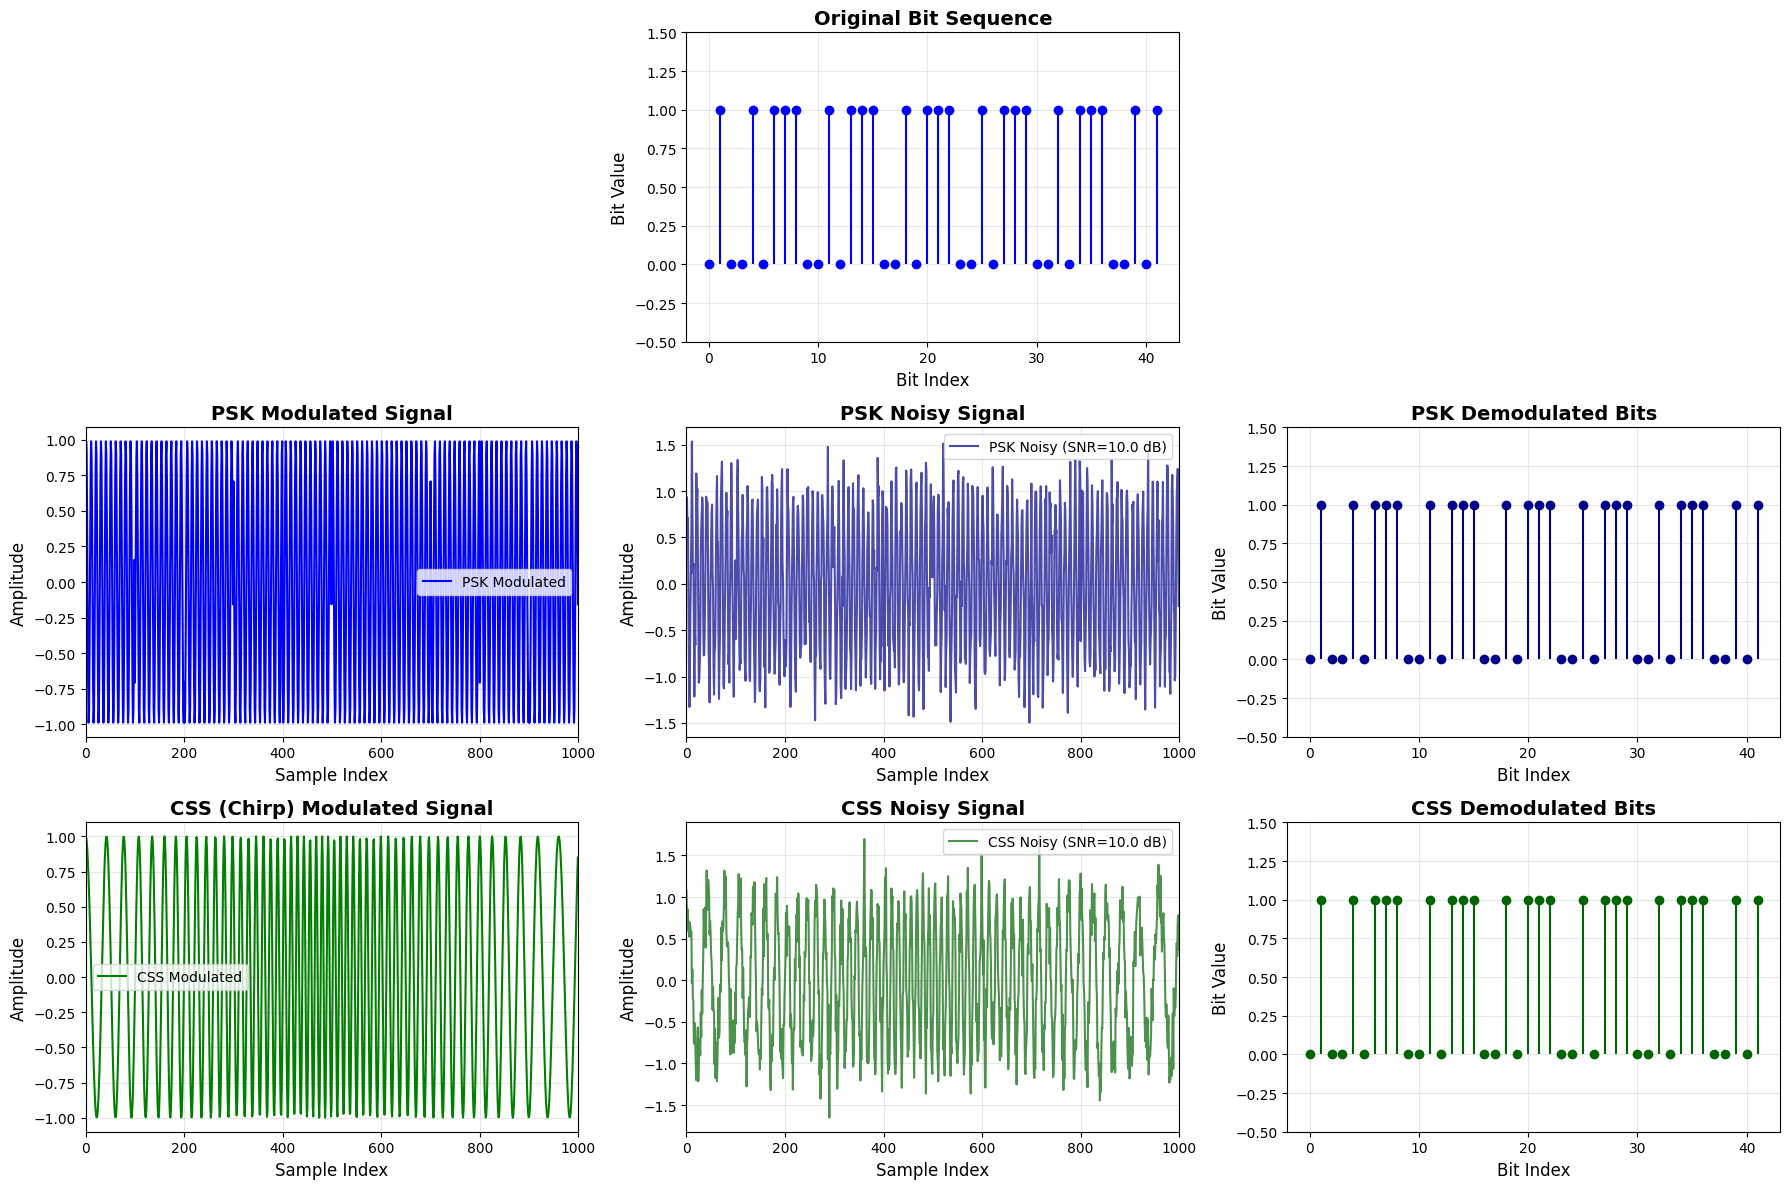

In [67]:
# Visualization of Modulated Signals
N = 1000  # Number of first samples to plot

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Row 1: Original Signal (centered in middle column)
axes[0, 0].axis('off')  # Turn off left subplot
axes[0, 1].stem(test_sequence, basefmt=' ', linefmt='blue', markerfmt='bo')
axes[0, 1].set_title('Original Bit Sequence', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Bit Index', fontsize=12)
axes[0, 1].set_ylabel('Bit Value', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(-0.5, 1.5)
axes[0, 2].axis('off')  # Turn off right subplot

# Row 2: PSK Modulation Chain
axes[1, 0].plot(psk_modulated[:N], linewidth=1.5, color='blue', label='PSK Modulated')
axes[1, 0].set_title('PSK Modulated Signal', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sample Index', fontsize=12)
axes[1, 0].set_ylabel('Amplitude', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, N)
axes[1, 0].legend()

axes[1, 1].plot(psk_noisy[:N], linewidth=1.5, color='darkblue', alpha=0.7, label=f'PSK Noisy (SNR={SNR_DB} dB)')
axes[1, 1].set_title('PSK Noisy Signal', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('Amplitude', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, N)
axes[1, 1].legend()

axes[1, 2].stem(psk_demodulated, basefmt=' ', linefmt='darkblue', markerfmt='o')
axes[1, 2].set_title('PSK Demodulated Bits', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Bit Index', fontsize=12)
axes[1, 2].set_ylabel('Bit Value', fontsize=12)
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_ylim(-0.5, 1.5)

# Row 3: CSS Modulation Chain
axes[2, 0].plot(css_modulated[:N], linewidth=1.5, color='green', label='CSS Modulated')
axes[2, 0].set_title('CSS (Chirp) Modulated Signal', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Sample Index', fontsize=12)
axes[2, 0].set_ylabel('Amplitude', fontsize=12)
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim(0, N)
axes[2, 0].legend()

axes[2, 1].plot(css_noisy[:N], linewidth=1.5, color='darkgreen', alpha=0.7, label=f'CSS Noisy (SNR={SNR_DB} dB)')
axes[2, 1].set_title('CSS Noisy Signal', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Sample Index', fontsize=12)
axes[2, 1].set_ylabel('Amplitude', fontsize=12)
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlim(0, N)
axes[2, 1].legend()

axes[2, 2].stem(css_demodulated, basefmt=' ', linefmt='darkgreen', markerfmt='o')
axes[2, 2].set_title('CSS Demodulated Bits', fontsize=14, fontweight='bold')
axes[2, 2].set_xlabel('Bit Index', fontsize=12)
axes[2, 2].set_ylabel('Bit Value', fontsize=12)
axes[2, 2].grid(True, alpha=0.3)
axes[2, 2].set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()


# Entire Chain
Here we can observe the entire encoding and decoding chain.

In [68]:
# Complete Encoding/Decoding Chain
import pandas as pd

SNR_DB_CHAIN = 12.0

# Test all 4 combinations: (Huffman/Lempel-Ziv) x (PSK/CSS)
combinations = [
    ("Huffman + PSK", huffman_coder, psk_modulator, "PSK"),
    ("Huffman + CSS", huffman_coder, css_modulator, "CSS"),
    ("Lempel-Ziv + CSS", lempel_ziv_coder, css_modulator, "CSS"),
    ("Lempel-Ziv + PSK", lempel_ziv_coder, psk_modulator, "PSK"),
]

results = []

for combo_name, source_coder, modulator, mod_name in combinations:
    # ENCODING CHAIN
    # 1. Source coding
    source_encoded = source_coder.encode(input_text)
    
    # 2. Channel coding (Hamming)
    channel_encoded = hamming_coder_74.encode(source_encoded)
    
    # 3. Pad for PSK if needed (PSK requires even number of bits)
    padding_added = 0
    if mod_name == "PSK" and len(channel_encoded) % 2 != 0:
        channel_encoded = np.append(channel_encoded, 0)
        padding_added = 1
    
    # 4. Modulation
    if mod_name == "PSK":
        modulated = modulator.PSK_modulate(channel_encoded)
    else:  # CSS
        modulated = modulator.CSS_modulate(channel_encoded)
    
    # 5. Add noise
    modulated_with_noise = modulator.add_awgn_noise(modulated, SNR_DB_CHAIN)
    
    # DECODING CHAIN
    # 6. Demodulation
    if mod_name == "PSK":
        demodulated = modulator.PSK_demodulate(modulated_with_noise)
    else:  # CSS
        demodulated = modulator.CSS_demodulate(modulated_with_noise)
    
    # 7. Remove padding if it was added
    if padding_added > 0:
        demodulated = demodulated[:-padding_added]
    
    # 8. Channel decoding (Hamming)
    channel_decoded = hamming_coder_74.decode(demodulated)
    
    # 9. Source decoding
    source_decoded = source_coder.decode(channel_decoded)
    
    # Store results
    results.append({
        'Combination': combo_name,
        'Input Text': input_text[:30] + '...' if len(input_text) > 30 else input_text,
        'Source Coding': f'{type(source_coder).__name__}',
        'Source Coding Length': len(source_encoded),
        'Channel Coding': 'Hamming(7,4)',
        'Channel Coding Length': len(channel_encoded),
        'Modulation': mod_name,
        'Modulated Length': len(modulated),
        'Modulated w/ Noise Length': len(modulated_with_noise),
        'Demodulated Length': len(demodulated),
        'Channel Decoded Length': len(channel_decoded),
        'Source Decoded': source_decoded[:30] + '...' if len(source_decoded) > 30 else source_decoded,
        'Source Decoded Length': len(source_decoded),
        'Equal to Original': '✓' if source_decoded == input_text else '✗'
    })

# Create DataFrame
df = pd.DataFrame(results)

# Display with better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 40)

print("=" * 120)
print("COMPLETE TRANSMISSION CHAIN - RESULTS TABLE")
print("=" * 120)
print(df.to_string(index=False))
print("=" * 120)


COMPLETE TRANSMISSION CHAIN - RESULTS TABLE
     Combination    Input Text  Source Coding  Source Coding Length Channel Coding  Channel Coding Length Modulation  Modulated Length  Modulated w/ Noise Length  Demodulated Length  Channel Decoded Length Source Decoded  Source Decoded Length Equal to Original
   Huffman + PSK Hello, world!   HuffmanCoder                   277   Hamming(7,4)                    490        PSK             24500                      24500                 490                     280  Hello, world!                     13                 ✓
   Huffman + CSS Hello, world!   HuffmanCoder                   277   Hamming(7,4)                    490        CSS            235200                     235200                 490                     280  Hello, world!                     13                 ✓
Lempel-Ziv + CSS Hello, world! LempelZivCoder                   380   Hamming(7,4)                    665        CSS            319200                     319200         